<a href="https://colab.research.google.com/github/Rob192/verbatim/blob/master/verbatim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import des données

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Rob192/verbatim/master/sondage.csv', sep= ';')

In [0]:
col = ["mess_min", 
        "mess_autre",
        "instant_min",
        "instant_autre",
        "visio_min",
        "visio_intermin",
        "visio_autre",
        "collab_min",
        "collab_intermin",
        "collab_autre",
        'audio']

In [0]:
df.columns = col

In [46]:
df.head()

,mess_min,mess_autre,instant_min,instant_autre,visio_min,visio_intermin,visio_autre,collab_min,collab_intermin,collab_autre,audio
0,Tres utile,Pas utile,Non utilise,Non utilise,Non utilise,Non utilise,Utile,Non utilise,Non utilise,Utile,Tres utile
1,Tres utile,Utile,Non utilise,Utile,Non utilise,Non utilise,Utile,Non utilise,Non utilise,Utile,Tres utile
2,Tres utile,Pas utile,Inconnu,Tres utile,Non utilise,Non utilise,Tres utile,Non utilise,Inconnu,Non utilise,Tres utile
3,Non utilise,Non utilise,Non utilise,Non utilise,Non utilise,Non utilise,Tres utile,Non utilise,Non utilise,Tres utile,Tres utile
4,Tres utile,Non utilise,Non utilise,Tres utile,Non utilise,Pas utile,Tres utile,Inconnu,Inconnu,Tres utile,Tres utile


# Les outils du ministère sont-ils connus ? 

In [47]:
counts = df[col].apply(pd.value_counts)
counts

,mess_min,mess_autre,instant_min,instant_autre,visio_min,visio_intermin,visio_autre,collab_min,collab_intermin,collab_autre,audio
Inconnu,17,42,135,28,118,140,31,201,358,232,14
Non utilise,35,588,574,376,427,556,391,392,438,462,81
Pas utile,15,85,120,66,68,93,36,52,47,29,12
Tres utile,830,127,45,292,198,82,327,97,59,124,731
Utile,109,164,132,244,195,135,221,264,104,159,168


In [0]:
cols = counts.columns
ratio = pd.DataFrame()
for c in cols:
  ratio[c] = counts[c] / counts[c].sum() * 100

In [49]:
ratio

,mess_min,mess_autre,instant_min,instant_autre,visio_min,visio_intermin,visio_autre,collab_min,collab_intermin,collab_autre,audio
Inconnu,1.689861,4.174950,13.419483,2.783300,11.729622,13.916501,3.081511,19.980119,35.586481,23.061630,1.391650
Non utilise,3.479125,58.449304,57.057654,37.375746,42.445328,55.268390,38.866799,38.966203,43.538767,45.924453,8.051690
Pas utile,1.491054,8.449304,11.928429,6.560636,6.759443,9.244533,3.578529,5.168986,4.671968,2.882704,1.192843
Tres utile,82.504970,12.624254,4.473161,29.025845,19.681909,8.151093,32.504970,9.642147,5.864811,12.326044,72.664016
Utile,10.834990,16.302187,13.121272,24.254473,19.383698,13.419483,21.968191,26.242545,10.337972,15.805169,16.699801


In [0]:
ratio_copy = ratio.copy()

In [51]:
ratio = ratio.T
ratio.columns

Index(['Inconnu', 'Non utilise', 'Pas utile', 'Tres utile', 'Utile'], dtype='object')

In [0]:
cols = ['Inconnu', 'Non utilise', 'Pas utile', 'Utile','Tres utile']
ratio = ratio[cols]

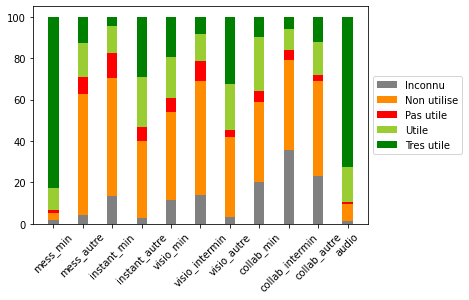

In [53]:
cols = ratio.columns
fig, ax = plt.subplots()
labels = ratio.index.to_list()
width = 0.35     # the width of the bars: can also be len(x) sequence

color_dict = {'Inconnu':'grey',
    'Non utilise':'darkorange',
 'Pas utile': 'red',
 'Utile':'yellowgreen',
 'Tres utile':'green'}

bot = np.zeros(ratio.shape[0])
for n in cols:
    m = n
    ax.bar(labels, ratio[m], width, bottom = bot, label=n , color = color_dict[n])
    bot += ratio[m]


#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.show()

In [0]:
ratio['Utilise'] = ratio['Utile'] + ratio['Tres utile']
ratio['Inutilise'] = ratio['Non utilise'] + ratio['Pas utile']
ratio = ratio[['Inconnu','Inutilise','Utilise']]
ratio = ratio.sort_values('Utilise', ascending=False)

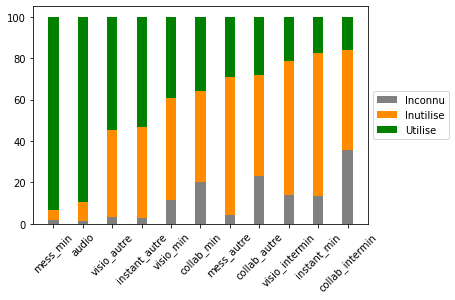

In [55]:
cols = ratio.columns
fig, ax = plt.subplots()
labels = ratio.index.to_list()
width = 0.35     # the width of the bars: can also be len(x) sequence

color_dict = {'Inconnu':'grey',
    'Inutilise':'darkorange',
 'Pas utile': 'red',
 'Utilise':'green',
 'Tres utile':'green'}

bot = np.zeros(ratio.shape[0])
for n in cols:
    m = n
    ax.bar(labels, ratio[m], width, bottom = bot, label=n , color = color_dict[n])
    bot += ratio[m]


#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.show()

On voit que parmis les 5 services les plus utilisés, 3 sont des services du ministère. Il n'y a pas beaucoup de travail à faire pour que le service de visio du ministère devienne un outil plesbicité. Il y a un travail à faire sur les outils collaboratifs pour les rendre plus connus. La messagerie instantannée est un challenge car d'autres outils que ceux du ministère sont fortement utilisés. 

# Les outils du ministère sont-il préférés aux autres outils ?


## Donnons des notes aux commentaires

In [0]:
def give_grade (comment):
  grades = {"Tres utile":2,"Utile":1,"Non utilise":0,"Pas utile":-1, "Inconnu":0}
  return grades[comment]
# Apply on every columns 
for c in col:
  df[c+"_grade"] = df[c].apply(lambda x: give_grade(x))

In [0]:
data = {"mess_min_vs_autre": df.mess_min_grade - df.mess_autre_grade,
        "instant_min_vs_autre": df.instant_min_grade - df.instant_autre_grade,
        "visio_min_vs_autre": df.visio_min_grade - df.visio_autre_grade,
        "visio_min_vs_intermin": df.visio_min_grade - df.visio_intermin_grade,
        "collab_min_vs_autre": df.collab_min_grade - df.collab_autre_grade,
        "collab_min_vs_intermin": df.collab_min_grade - df.collab_intermin_grade,
        }
df_comparison = pd.DataFrame()
df_comparison = df_comparison.from_dict(data)

## Représentation en box plot 

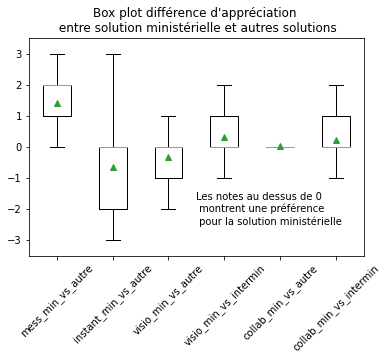

In [15]:
def show_box_plot (df_comparison):
  data = [df_comparison[col].values for col in df_comparison.columns]
  data = [d[~np.isnan(d)] for d in data]
  plt.boxplot(data, showmeans=True, showfliers = False)
  plt.xticks([i+1 for i in range (len(data))],df_comparison.columns.tolist(), rotation = 45)
  plt.title("Box plot différence d'appréciation \n entre solution ministérielle et autres solutions")
  plt.text(3.5,-2.5,"Les notes au dessus de 0 \n montrent une préférence\n pour la solution ministérielle")
  plt.ylim(-3.5,3.5)
  plt.show()
show_box_plot(df_comparison)

## Représentation en histogramme

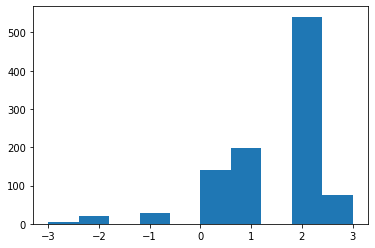

In [11]:
plt.hist(df.mess_min_grade - df.mess_autre_grade)
plt.show()

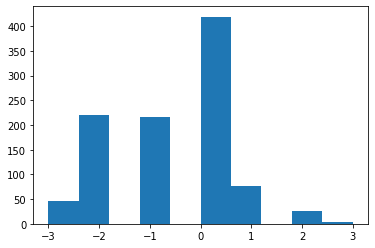

In [12]:
plt.hist(df.instant_min_grade - df.instant_autre_grade)
plt.show()

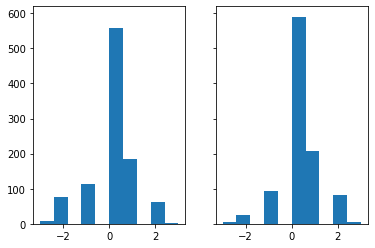

In [13]:
fix, ax = plt.subplots(1,2, sharey= True)
ax[0].hist(df.collab_min_grade - df.collab_autre_grade)
ax[1].hist(df.collab_min_grade - df.collab_intermin_grade)
plt.show()

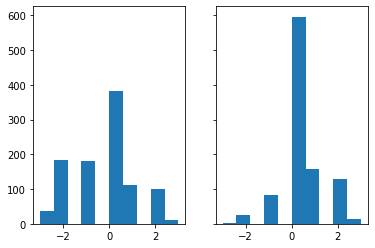

In [14]:
fix, ax = plt.subplots(1,2, sharey= True)
ax[0].hist(df.visio_min_grade - df.visio_autre_grade)
ax[1].hist(df.visio_min_grade - df.visio_intermin_grade)
plt.show()